## East vs. West Coast Significant Wave Heights

Jupyter Notebook to illustrate how to use xarray and opendap to access buoy data from the National Data Buoy Center (NDBC)

For class we posed the question: who had bigger waves reported in the past 45 days, west coast vs. east coast?

The west coast won, but Oregon Inlet beat out Southern California.

If using Google Colab uncomment lines in this cell and run. Otherwise skip to next cell.

In [1]:
# !pip install xarray
# !pip install netcdf4
# !pip install h5pyd
# import urllib, requests, h5pyd

Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

url for NDBC thredds

https://dods.ndbc.noaa.gov/thredds/catalog/data/stdmet/catalog.html

We started with Oregon Inlet buoy off the norther outer banks of NC

In [3]:
url = "https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44095/44095h9999.nc"
print(url)

https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44095/44095h9999.nc


In [4]:
type(url)

str

In [5]:
ds = xr.open_dataset(url)

ds

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 2639)
Coordinates:
  * latitude                 (latitude) float32 35.75
  * longitude                (longitude) float32 -75.33
  * time                     (time) datetime64[ns] 2023-12-06T00:26:00 ... 20...
Data variables: (12/13)
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    gust                     (time, latitude, longitude) float32 ...
    ...                       ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
Attributes:
    institution:                     NOAA National Data Buoy Center and Parti...
    url:                             http://dods.ndbc.noaa.gov
    quality:                         Automated QC checks with daily manual QC
    conventions:                     COARDS
    station:                         44095
    comment:                         Oregon Inlet, NC (192)
    location:                        35.750 N 75.330 W 
    DODS_EXTRA.Unlimited_Dimension:  time

Sea Surface Temperature (SST)

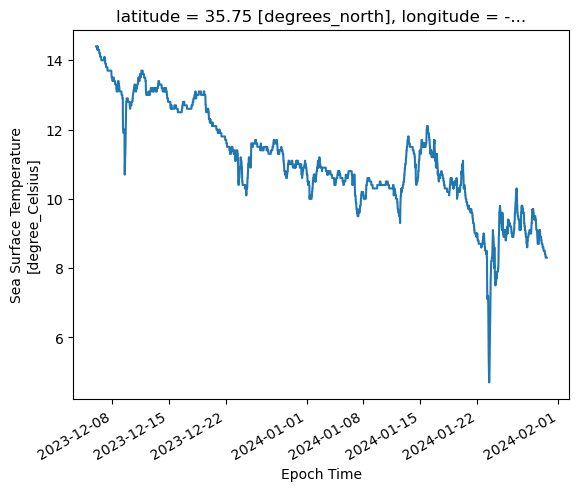

In [6]:
# ds.air_temperature.plot() # No output
ds.sea_surface_temperature.plot()

Significant Wave Height

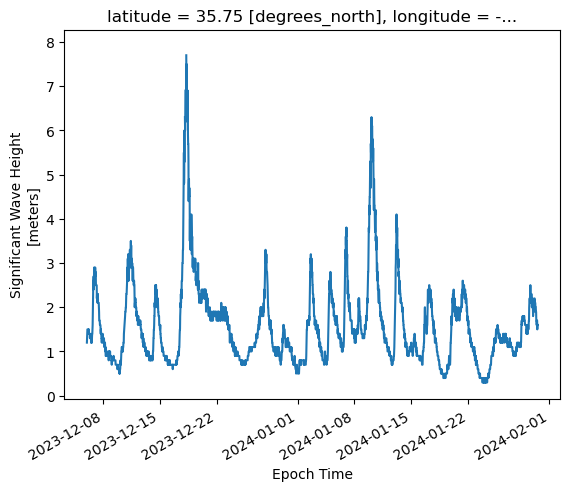

In [7]:
ds.wave_height.plot()

Rename variable and convert to feet

In [8]:
wave_height_oregon_inlet = ds.wave_height*3.3 # ft

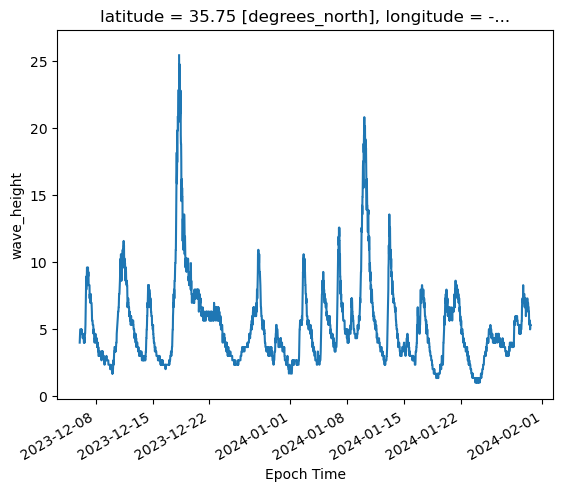

In [9]:
wave_height_oregon_inlet.plot()

Maximum Wave Height

In [10]:
wave_height_oregon_inlet.max()

<xarray.DataArray 'wave_height' ()>
array(26.06999969)

New buoy on the west coast off the San Diego coast in La Jolla

In [11]:
url = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46225/46225h9999.nc'
ds_sd = xr.open_dataset(url)

ds_sd

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 2640)
Coordinates:
  * latitude                 (latitude) float32 32.93
  * longitude                (longitude) float32 -117.4
  * time                     (time) datetime64[ns] 2023-12-06T00:26:00 ... 20...
Data variables: (12/13)
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    gust                     (time, latitude, longitude) float32 ...
    ...                       ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
Attributes:
    institution:                      NOAA National Data Buoy Center and Part...
    url:                              http://dods.ndbc.noaa.gov
    quality:                          Automated QC checks with daily manual QC
    conventions:                      COARDS
    station:                          46225
    comment:                          Torrey Pines Outer, CA (100)
    location:                         32.933 N 117.391 W 
    sea_floor_depth_below_sea_level:  549.0m
    water_temperature_depth:          0.5m
    DODS_EXTRA.Unlimited_Dimension:   time

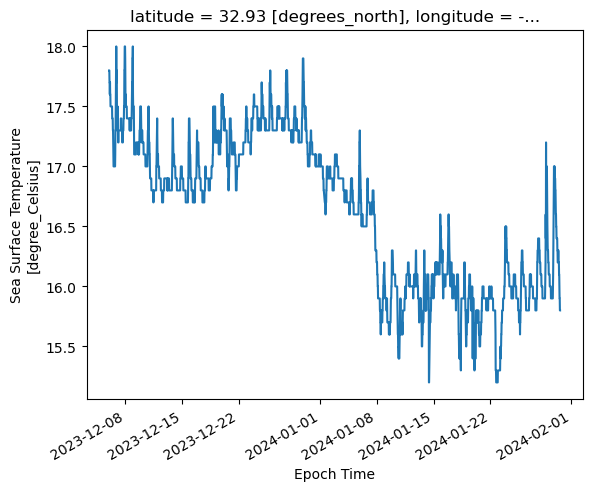

In [12]:
ds_sd.sea_surface_temperature.plot()

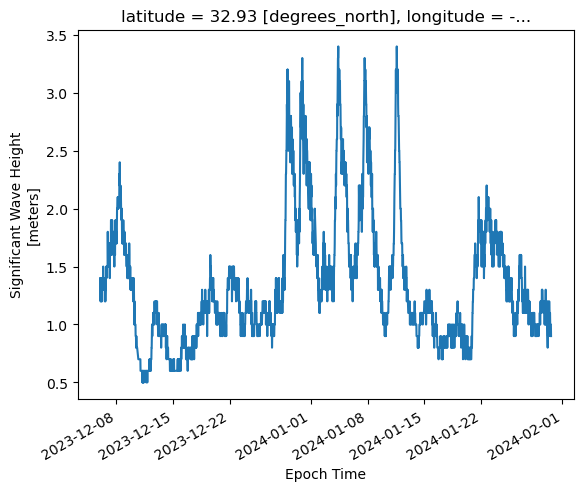

In [13]:
ds_sd.wave_height.plot()

In [14]:
wave_height_sd = ds_sd.wave_height*3.3 # ft

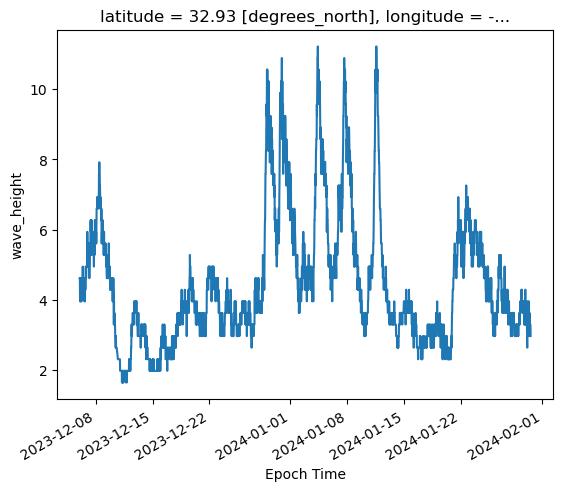

In [15]:
wave_height_sd.plot()

In [16]:
wave_height_sd.max()

<xarray.DataArray 'wave_height' ()>
array(11.22000027)

A buoy off Point Sur representing the central coast of California

In [17]:
url = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46239/46239h9999.nc'
ds_point_sur = xr.open_dataset(url)

ds_point_sur

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 2651)
Coordinates:
  * latitude                 (latitude) float32 36.34
  * longitude                (longitude) float32 -122.1
  * time                     (time) datetime64[ns] 2023-12-06T00:30:00 ... 20...
Data variables: (12/13)
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    dewpt_temperature        (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    gust                     (time, latitude, longitude) float32 ...
    ...                       ...
    sea_surface_temperature  (time, latitude, longitude) float32 ...
    visibility               (time, latitude, longitude) float32 ...
    water_level              (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
Attributes:
    institution:                      NOAA National Data Buoy Center and Part...
    url:                              http://dods.ndbc.noaa.gov
    quality:                          Automated QC checks with daily manual QC
    conventions:                      COARDS
    station:                          46239
    comment:                          Point Sur, CA (157)
    location:                         36.335 N 122.104 W 
    sea_floor_depth_below_sea_level:  366.0m
    water_temperature_depth:          0.5m
    DODS_EXTRA.Unlimited_Dimension:   time

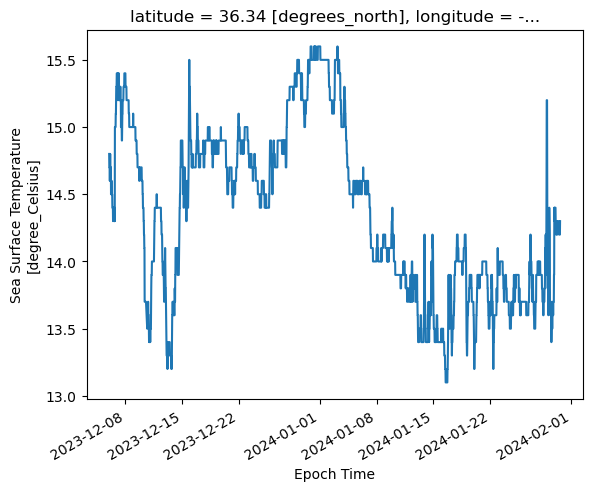

In [18]:
ds_point_sur.sea_surface_temperature.plot()

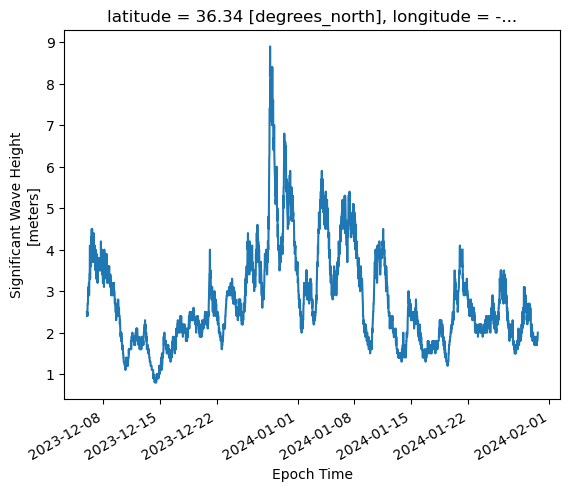

In [19]:
ds_point_sur.wave_height.plot()

In [20]:
wave_height_point_sur = ds_point_sur.wave_height*3.3 # ft

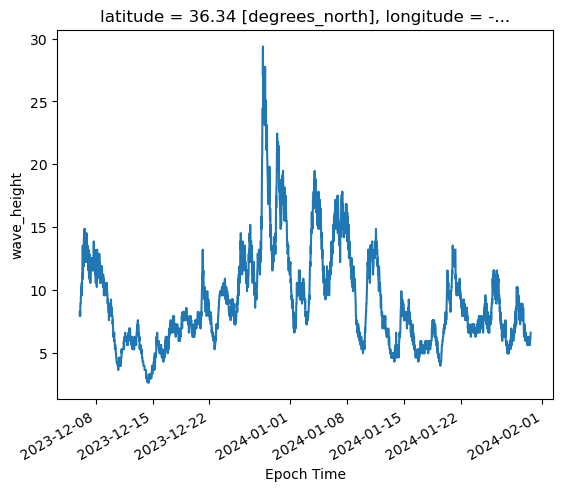

In [21]:
wave_height_point_sur.plot()

List variables using the whos command

In [22]:
whos

Variable                   Type         Data/Info
-------------------------------------------------
ds                         Dataset      <xarray.Dataset>\nDimensi<...>nlimited_Dimension:  time
ds_point_sur               Dataset      <xarray.Dataset>\nDimensi<...>limited_Dimension:   time
ds_sd                      Dataset      <xarray.Dataset>\nDimensi<...>limited_Dimension:   time
np                         module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
plt                        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
url                        str          https://dods.ndbc.noaa.go<...>tdmet/46239/46239h9999.nc
wave_height_oregon_inlet   DataArray    <xarray.DataArray 'wave_h<...>0 ... 2024-01-30T14:26:00
wave_height_point_sur      DataArray    <xarray.DataArray 'wave_h<...>0 ... 2024-01-30T14:30:00
wave_height_sd             DataArray    <xarray.DataArray 'wave_h<...>0 ... 2024-01-30T14:26:00
xr                         module   

Lets put it all together on the same plot and modify labels

Text(0.5, 1.0, 'West Coast vs. East Coast Surf Winter 2023/2024')

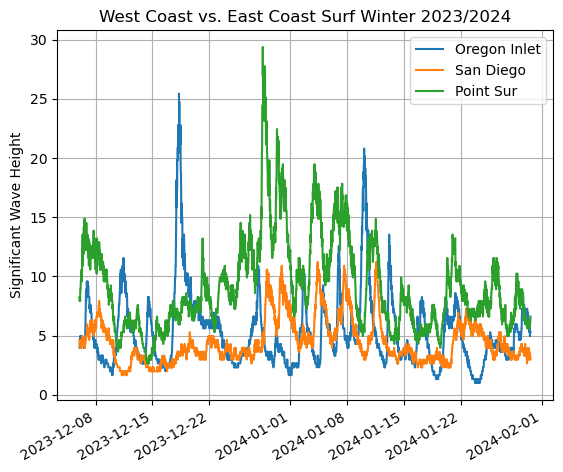

In [23]:
wave_height_oregon_inlet.plot()
wave_height_sd.plot()
wave_height_point_sur.plot()

plt.grid(True)
plt.legend(('Oregon Inlet', 'San Diego', 'Point Sur'))
plt.ylabel('Significant Wave Height')
plt.xlabel('')
plt.title('West Coast vs. East Coast Surf Winter 2023/2024')

If you wanted to change what variable is plotted on the y-axis in xarray

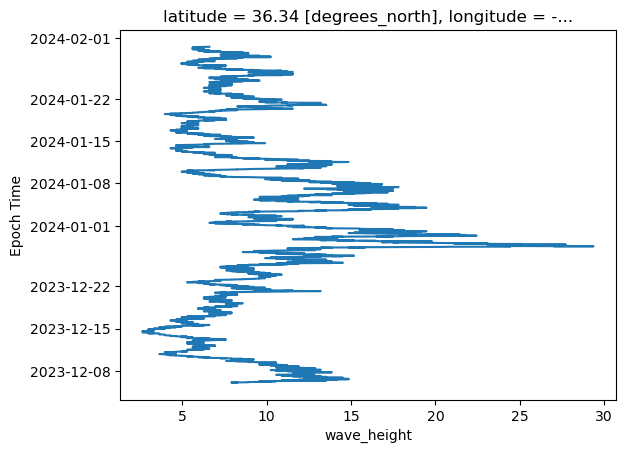

In [24]:
wave_height_point_sur.plot(y='time')